# Makine Öğrenmesi

## 1. Doğrusal Regresyon

Doğrusal regresyon analizi, bir değişkenin değerini başka bir değişkenin değerine göre tahmin etmek için kullanılır. Tahmin etmek istediğiniz değişken, bağımlı değişken olarak adlandırılır. Diğer değişkenin değerini tahmin etmek için kullandığınız değişken ise bağımsız değişken olarak adlandırılır.

Birden çok doğrusal regresyon yöntemleri olsa da bu başlık altında 
##### • Basit Doğrusal Regresyon 
#####  • Çoklu Doğrusal Regresyon 
#####  • PLS (Kısmi En Küçük Kareler Regresyonu)
#####  • ElasticNet (eNet) Regresyonu
yöntemlerini ele alarak veri setimiz üzerinde inceleyeceğiz. 

## 1.1. Basit Doğrusal Regresyon

### 1.1.1. Modelleme

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("dataset/youtubeGB.csv",usecols=[7,8,9,10]) # usecols ile hangi kolonların kullanılacağını belirttik.
youtube=df.copy()
youtube.head()

,views,likes,dislikes,comment_count
0,7224515,55681,10247,9479
1,1053632,25561,2294,2757
2,17158579,787420,43420,125882
3,27833,193,12,37
4,9815,30,2,30


In [3]:
youtube.describe().T

,count,mean,std,min,25%,50%,75%,max
views,38916.0,5.911944e+06,1.900121e+07,851.0,251527.25,981889.0,3683628.50,424538912.0
likes,38916.0,1.345196e+05,3.499893e+05,0.0,5897.00,25182.5,114089.25,5613827.0
dislikes,38916.0,7.612560e+03,5.095683e+04,0.0,200.00,821.0,3357.50,1944971.0
comment_count,38916.0,1.308835e+04,5.066740e+04,0.0,679.00,2478.0,9241.50,1626501.0


In [4]:
# Verisetindeki kullanacağımız kolonlar arasında null ya da NaN değer var mı diye bakıyoruz.
youtube.isnull().values.any()

False

In [5]:
# Veriler arasındaki ilişkiyi(korelasyonu) bulalım.
youtube.corr()

,views,likes,dislikes,comment_count
views,1.000000,0.795862,0.392407,0.466899
likes,0.795862,1.000000,0.446746,0.744361
dislikes,0.392407,0.446746,1.000000,0.771772
comment_count,0.466899,0.744361,0.771772,1.000000


Yukarıda bağımsız değişkenlerin(likes, dislikes, comment_count) bağımlı değişken(views) üzerindeki etkisi görülmektedir.

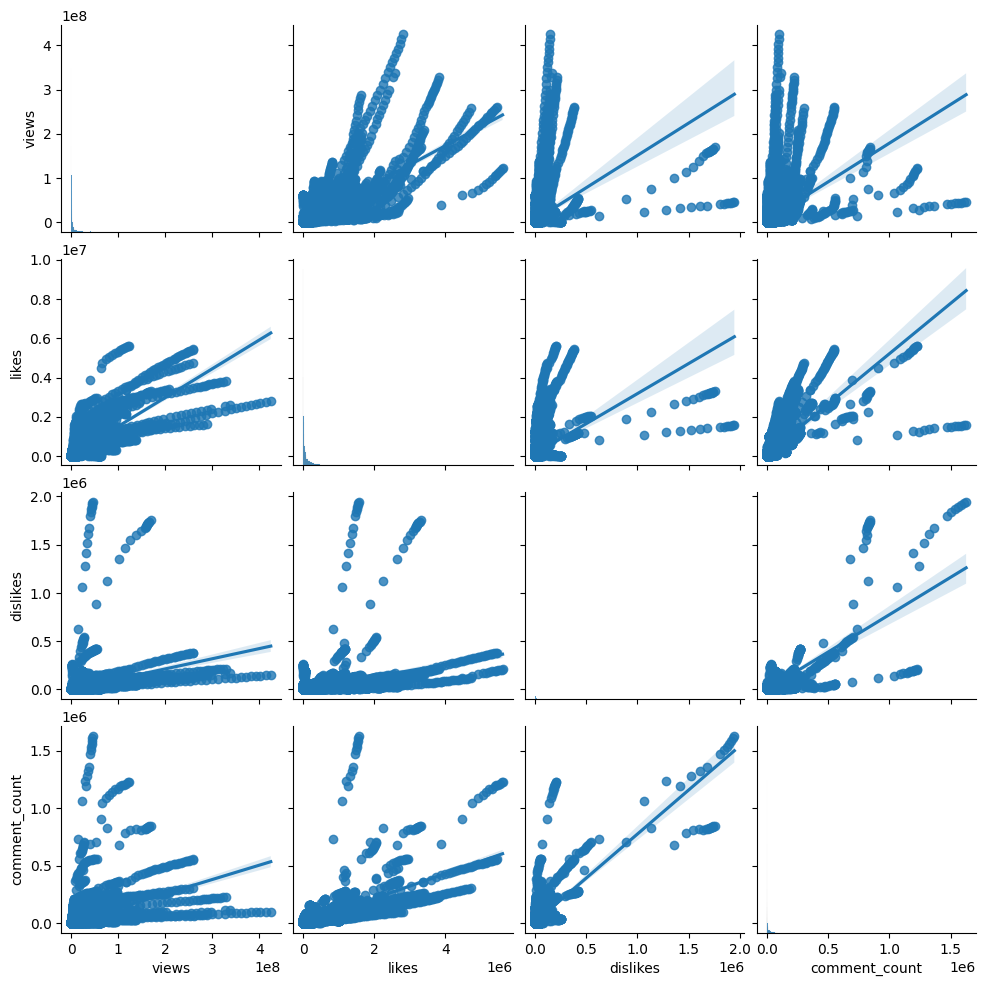

In [2]:
# Yukarıdaki sonucu şimdi de grafik üzerinde görelim.
sns.pairplot(youtube, kind ="reg");

##### Yukarıdaki grafiği incelediğimizde;
######  - Beğeni sayılarının izlenme sayısına etkisinin az olduğunu yani korelasyon eğrisinin eğiminin az olduğunu görebiliyoruz.
######  - Beğenmeme ve yorum sayılarının izlenme sayısına etkisinin beğeni sayısına etkisine göre fazla olduğunu görebilmekteyiz.
######  - dislikes ve comment_count alanlarının izlenme sayılarındaki varyasyonu açıklama noktasında hem dislikes hem de comment_count alanlarını kullanabileceğimiz anlamına gelmektedir.

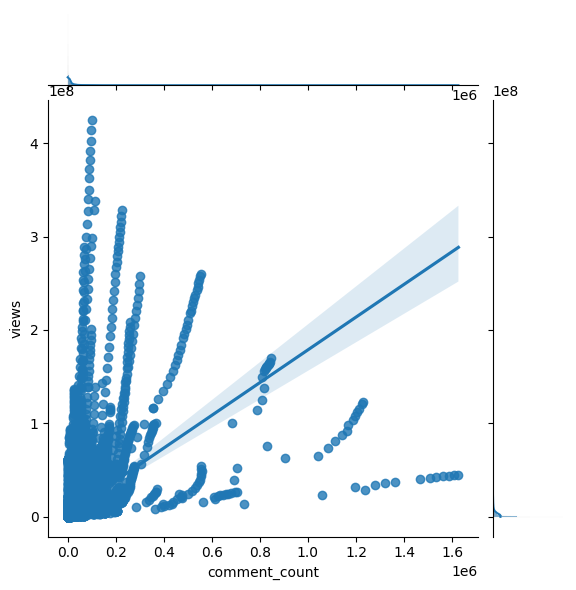

In [4]:
# Yorum sayılarının izlenme sayısına olan etkisini grafik üzerinde görelim.
sns.jointplot(x = "comment_count", y = "views", data = youtube, kind = "reg");

### Sklearn ile Modelleme

In [9]:
# Aynı işlemin sklearn kutuphanesi ile yapılması
from sklearn.linear_model import LinearRegression

X = youtube[["comment_count"]]
y = youtube["views"]
reg = LinearRegression()
model = reg.fit(X, y) # fit() ile veri seti üzerinde modelin eğitilmesini gerçekleştirmiş oluyoruz. 
print(model.intercept_)
print(model.coef_)

3620227.6997086382
[175.09582004]


In [10]:
model.score(X,y) # score() yöntemi, modelin belirtilen veri seti üzerindeki doğruluk skorunu hesaplar.

0.21799487075803914

In [11]:
model.predict(X)[0:10] # Eğitilmiş bir makine öğrenmesi modelinin verilen giriş özellikleri X üzerinde tahmin yapmasını sağlar.

array([ 5279960.97785685,  4102966.87555574, 25661639.71783859,
        3626706.24505008,  3625480.5743098 ,  4028726.24785926,
       18515103.82295311,  3729487.49141288,  3657172.91773683,
        5629102.04301431])

In [12]:
y[0:10] # Gerçek değerler

0     7224515
1     1053632
2    17158579
3       27833
4        9815
5     1182775
6    33523622
7     1164201
8      154494
9     9548677
Name: views, dtype: int64

### 1.1.2. Tahmin

###### Model Denklemi: 
    Views= 3620227.69 + comment_count*175.09

In [13]:
# Örneğin 10 yorum olduğunda izlenmelerin tahmini değeri ne olur?

3620227.69 + 10*175.09

3621978.59

In [15]:
from sklearn.linear_model import LinearRegression

from warnings import filterwarnings
filterwarnings('ignore') # Uyarı mesajlarını kapatmak için kullanılır.

X = youtube[["comment_count"]]
y = youtube["views"]
reg = LinearRegression()
model = reg.fit(X, y) # Modelin fit edilmesi(eğitilmesi)
model.predict([[10]]) # Eğitilmiş model üzerinde tahmin yapmasını sağlar.


array([3621978.65790903])

Sonucun üsttekinden farklı olmasının sebebi; virgülden sonraki yuvarlama işlemimizden kaynaklanmaktadır.

In [16]:
# Şimdi de çoklu tahmin işlemi yapalım.
yeniVeri = [[5],[50],[100]]
model.predict(yeniVeri)

array([3621103.17880883, 3628982.49071058, 3637737.28171252])

#### Artıklar ve Makine Öğrenmesindeki Önemi

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

lm = smf.ols("views ~ comment_count", youtube)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:06:46   Log-Likelihood:            -7.0267e+05
No. Observations:               38916   AIC:                         1.405e+06
Df Residuals:                   38914   BIC:                         1.405e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.62e+06    8.8e+04     41.151      0.000    3.45e+06    3.79e+06
comment_count   175.0958      1.681    104.153      0.000     171.801     178.391
==============================================================================
Omnibus:                    55028.765   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32013840.857
Skew:                           8.155   Prob(JB):                         0.00
Kurtosis:                     142.561   Cond. No.                     5.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse = mean_squared_error(y, model.fittedvalues)
mse

282332552927934.9

In [19]:
# Yukarıdaki sonucun karekökünü alalım.
rmse = np.sqrt(mse)
rmse

16802754.325643606

In [22]:
# Karşılaştırma tablosu
k_table = pd.DataFrame({"gercek": y[0:10],
                        "tahmin": model.predict(X)[0:10]})
k_table

,gercek,tahmin
0,7224515,5.279961e+06
1,1053632,4.102967e+06
2,17158579,2.566164e+07
3,27833,3.626706e+06
4,9815,3.625481e+06
5,1182775,4.028726e+06
6,33523622,1.851510e+07
7,1164201,3.729487e+06
8,154494,3.657173e+06
9,9548677,5.629102e+06


In [23]:
# Gerçek değerlerden tahmin değerleri çıkarıp hataları hesaplayalım.
k_table["hata"] = k_table["gercek"] - k_table["tahmin"]
k_table

,gercek,tahmin,hata
0,7224515,5.279961e+06,1.944554e+06
1,1053632,4.102967e+06,-3.049335e+06
2,17158579,2.566164e+07,-8.503061e+06
3,27833,3.626706e+06,-3.598873e+06
4,9815,3.625481e+06,-3.615666e+06
5,1182775,4.028726e+06,-2.845951e+06
6,33523622,1.851510e+07,1.500852e+07
7,1164201,3.729487e+06,-2.565286e+06
8,154494,3.657173e+06,-3.502679e+06
9,9548677,5.629102e+06,3.919575e+06


In [24]:
# Hataların karelerini alıp hata_kare adlı kolon altında yazalım.
k_table["hata_kare"] = k_table["hata"]**2
k_table

,gercek,tahmin,hata,hata_kare
0,7224515,5.279961e+06,1.944554e+06,3.781290e+12
1,1053632,4.102967e+06,-3.049335e+06,9.298443e+12
2,17158579,2.566164e+07,-8.503061e+06,7.230204e+13
3,27833,3.626706e+06,-3.598873e+06,1.295189e+13
4,9815,3.625481e+06,-3.615666e+06,1.307304e+13
5,1182775,4.028726e+06,-2.845951e+06,8.099439e+12
6,33523622,1.851510e+07,1.500852e+07,2.252556e+14
7,1164201,3.729487e+06,-2.565286e+06,6.580695e+12
8,154494,3.657173e+06,-3.502679e+06,1.226876e+13
9,9548677,5.629102e+06,3.919575e+06,1.536307e+13


In [25]:
# Toplam hata
np.sum(k_table["hata_kare"])

378974279881900.75

In [26]:
# Hata kareler ortalaması
np.mean(k_table["hata_kare"])

37897427988190.08

In [27]:
# Hata kareler ortalamasının karekokü
np.sqrt(np.mean(k_table["hata_kare"]))

6156088.692358978

In [28]:
# Her bir tahmin için artıklar/hatalar (10 gözlem için)
# Bu tahmin hataları, modelin performansını değerlendirmek veya hataların dağılımını incelemek için kullanılabilmektedir.
model.resid[0:10]

0    1.944554e+06
1   -3.049335e+06
2   -8.503061e+06
3   -3.598873e+06
4   -3.615666e+06
5   -2.845951e+06
6    1.500852e+07
7   -2.565286e+06
8   -3.502679e+06
9    3.919575e+06
dtype: float64

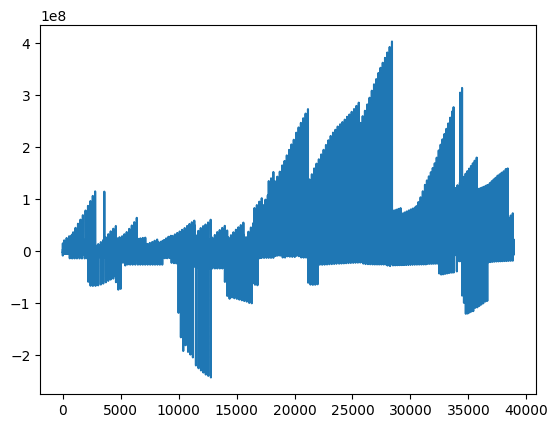

In [31]:
# Artıkların görselleştirilmesi
# Bu hatalar veri setindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği ve bu sorulara yanıt+ 
# aramaya bizi sevk edecek gözlemler.
import matplotlib.pyplot as plt

plt.plot(model.resid);

## 1.2. Çoklu Doğrusal Regresyon

Bağımlı değişkeni etkilediği düşünülen bağımsız değişkenlerden hangisinin ya da hangilerinin bağımlı değişkeni ne yönde ve ne şekilde etkilediğini tespit edebilmek için kullanılabilir.

#### Verisetinin Eğitim ve Test Verisetlerine Bölünmesi


In [15]:
import pandas as pd

df=pd.read_csv("dataset/youtubeGB.csv",usecols=[7,8,9,10])
youtube=df.copy()
youtube.head()

,views,likes,dislikes,comment_count
0,7224515,55681,10247,9479
1,1053632,25561,2294,2757
2,17158579,787420,43420,125882
3,27833,193,12,37
4,9815,30,2,30


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X = youtube.drop("views", axis = 1)
y = youtube["views"]
# randomstate; her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31132, 3)
(31132,)
(7784, 3)
(7784,)


In [34]:
# Verisetinin bütününün kopyası
training = youtube.copy()
training.shape

(38916, 4)

### 1.2.1. Model

#### Statsmodels ile modelleme

Eğer niyetimiz yorumlama yapmak ise Statsmodels kullanmak daha yararlı ve avantajlı olacaktır. 

In [35]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary() # Eğitilmiş doğrusal regresyon modelinin istatistiksel özetini görüntülemektedir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   1.455
Model:                            OLS   Adj. R-squared (uncentered):              1.455
Method:                 Least Squares   F-statistic:                         -3.318e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):                        1.00
Time:                        22:57:26   Log-Likelihood:                     -5.4485e+05
No. Observations:               31132   AIC:                                  1.090e+06
Df Residuals:                   31129   BIC:                                  1.090e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
likes            61.4422      0.241    255.282      0.000      60.970      61.914
dislikes        168.4715      1.842     91.482      0.000     164.862     172.081
comment_count  -276.6563      2.533   -109.226      0.000    -281.621    -271.692
==============================================================================
Omnibus:                    39378.062   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23061409.078
Skew:                           6.487   Prob(JB):                         0.00
Kurtosis:                     135.703   Cond. No.                         20.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### scikit-learn ile modelleme

Yorumlama konusunda Statsmodels kadar iyi değildir.

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Doğrusal regresyon modeli oluşturuyoruz.
model = lm.fit(X_train, y_train) # Oluşturulan model eğitilir.
# Sabit katsayı
print(model.intercept_)
# Bağımsız değişken katsayıları
print(model.coef_)

-47884.70713706501
[  61.49361499  168.46482623 -276.6928226 ]


### 1.2.2. Tahmin

##### Model Denklemi:
    Views= -47884.70 + likes*61.49 + dislikes*168.46 + comment_count*(-276.69)

In [37]:
# Örneğin 20 beğeni, 1 beğenmeme, 10 yorum olduğunda izlenmelerin tahmini değeri ne olur?

yeni_veri = [[20], [1],[10]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,20,1,10


In [38]:
# Modele örnek verilerimizi gönderip tahmini değer çıktısını üretiyoruz.
model.predict(yeni_veri)

array([-49253.29823701])

In [39]:
from sklearn.metrics import mean_squared_error

# Eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

9648299.924542176

In [40]:
# Test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

9985626.025411393

### 1.2.3. Model Tuning / Model Doğrulama

Model Tuning, bir makine öğrenmesi modelinin hiperparametrelerini ayarlayarak, modelin performansını iyileştirmek ve daha iyi genelleme yapabilmesini sağlamak için yapılan bir süreçtir.

In [42]:
X = youtube.drop('views', axis=1)
y = youtube["views"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=90)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

9784338.982438542
9423784.748363052


0.7363119131530064

###### Not: 
test ve train için eleman seçerken rastgelelilik kullandık. Ancak bu durum test skorlarımızı etkileyecektir. Bunun için de cross validation (çapraz doğrulama) yöntemini kullanabiliriz. Aşağıda 10 çevrimlik bir cross validation gerçekleştirilip ortalamaları alınmıştır. Böylelikle daha güvenilir bir hata bilgisine sahip olabiliriz.

In [43]:
# Eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7355886021817033

In [44]:
# neg_mean_squared_error'da sonuç negatif olacağı için üstte (-) ile çarpıyoruz.
rmseTrain=np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model,
                X_test,
                y_test,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

9739490.620799948
9263147.906971432


## 1.3. PLS (Kısmi En Küçük Kareler Regresyonu)

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.

PCR'da doğrusal kombinasyonlar yani bileşenler bağımsız değişken uzağındaki değişkenliği maksimum şekilde özetleyecek şekilde oluşturulur. Bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmaktadır.

PLS'de ise bileşenler bağımlı değişken ile olan kovaryansı maksimum şekilde özetleyecek şekilde oluşturulur.

Değişkenler atılmak istenmiyorsa ve açıklanabilirlik isteniyorsa PLS kullanılmalıdır.

PLS, gözetimli boyut indirgeme prosedürü, PCR gözetimsiz boyut indirgeme prosedürü olarak görülebilir.
##### 

### 1.3.1. Model

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]# video_id'lerini index olarak belirttik.
youtube=youtube.iloc[:,7:11]# Sayısal alanlardan 'views', 'likes', 'dislikes', 'comment_count' ile çalışacağımız için
                            # sadece o alanları seçtik.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])# Belirtilen kolonlar dummy(ikili) değişkenlere dönüştürülür.
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')# Belirtilen sütunlar çıkartılarak 
# yeni bir veri kümesi oluşturulur. Oluşturulan veri kümesi, sadece integer veri tiplerine sahip sütunları içerecektir.

X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)# axis=1 parametresi, birleştirme işlemini sütunlar 
                                                                        # üzerinde yapacağımızı ifade eder.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [29]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from warnings import filterwarnings
filterwarnings('ignore')

# Tüm bileşenler alındı.
pls_model = PLSRegression().fit(X_train, y_train)
# 3 bileşene indirgeyebiliriz. Ancak bu ara katmandaki PLS factor sayısını belirler, değişken sayısı yine aynıdır.
# pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

array([[16526502.79104256],
       [ -622455.18961646],
       [-1429269.65703426]])

### 1.3.2. Tahmin

In [30]:
X_train.head() # Eğitilmiş modelin ilk 5 değerini(head()) listeleyelim.

,likes,dislikes,comment_count
video_id,,,
SA7AIQw-7Ms,414711,5794,21208
JeRtUXTQ_aQ,45663,1368,2271
BsQZPKeaKBg,135,2,18
7bPSxB-8__o,28776,1989,2035
zwEn-ambXLw,7453,123,310


In [31]:
pls_model.predict(X_train)# Eğitilmiş model üzerinde tahminler yapar.

array([[ 1.90897388e+07],
       [ 2.06138480e+06],
       [-3.19914972e+04],
       ...,
       [ 1.15878876e+07],
       [ 1.46215007e+03],
       [ 4.41780569e+05]])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

11423571.650998536

In [33]:
r2_score(y_train, y_pred)

0.6409381841845208

In [34]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

11042973.954671234

### 1.3.3. Model Tuning

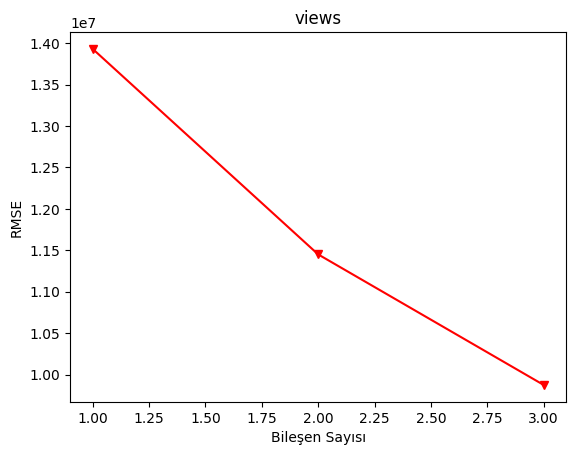

In [38]:
# CV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

# Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt

plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('views');

In [40]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)# Model oluşturulur ve eğitilir.

y_pred = pls_model.predict(X_test)# X_test veri kümesindeki girdi verileri için tahminler yapar.

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

11042973.954671234

#### Not:
Yukarıdaki çıktının sonucunu incelediğimizde; 
    PLSRegression(n_components=2) default değeri de 2 olduğundan bir önceki sonuçla aynı sonucu verdi.

## 1.4. ElasticNet (eNet) Regresyonu

Temel amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. 
ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

### 1.4.1. Model

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]# video_id'lerini index olarak belirttik.
youtube=youtube.iloc[:,7:11]# Sayısal alanlardan 'views', 'likes', 'dislikes', 'comment_count' ile çalışacağımız için
                            # sadece o alanları seçtik.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])# Belirtilen sütunların dummy değişkenlerine dönüşümü
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [63]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet().fit(X_train, y_train)# ElasticNet yöntemi ile modelin oluşturularak fit edilmesi
enet_model.coef_ # Eğitilmiş ElasticNet regresyon modelinin öğrenilen katsayılarını gösterir.

array([  61.76124664,  168.84762008, -277.87035993])

In [64]:
enet_model.intercept_ # Öğrenilen sabit terim

-56031.70438384544

### 1.4.2. Tahmin

In [65]:
enet_model

ElasticNet()

In [66]:
enet_model.predict(X_test)

array([13651160.10254715,   311148.82469009,   269796.16415316, ...,
          33951.08044075,   636686.27460045, 11158689.20420096])

In [67]:
y_pred = enet_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

9392856.911321785

In [68]:
r2_score(y_test, y_pred)

0.7506493810375872

### 1.4.3. Model Tuning

In [69]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train) # 10 katlı çapraz doğrulama (cv=10) kullanarak 
                                                                              # model eğitilir. 

enet_cv_model.alpha_ # Model tarafından belirlenen en iyi alfa değerini döndürmektedir.

10480519285.82185

In [70]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [72]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

y_pred = enet_tuned.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

11035230.069974117